<a href="https://colab.research.google.com/github/jessirree/dsc-phase1-final-project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1 Final Project**


### In this project, I will analyze aviation data for a company looking into operating airplanes.

First, I will import the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data



In [3]:
df = pd.read_csv("/content/drive/MyDrive/Aviation_Data.csv")
df.head()

/tmp/ipython-input-4178430452.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Inspect the data

In [8]:
df.info()       # Check data types and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
df.describe()   # Summarize numeric columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Then I figure out if there are any missing values in the dataset

In [11]:
df.isna().sum() # Count missing values per column

,0
Event.Id,1459
Investigation.Type,0
Accident.Number,1459
Event.Date,1459
Location,1511
Country,1685
Latitude,55966
Longitude,55975
Airport.Code,40216
Airport.Name,37644


In [13]:
df.shape

(90348, 31)

# Clean the data

1. Check for duplicates

In [17]:
# Count duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [16]:
# Drop duplicates
df = df.drop_duplicates()

2. Check for missing values

In [18]:
# Count missing values per column
print(df.isnull().sum())

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38826
Airport.Name              36254
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1451
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7165
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6453
Publication.Date          15299
dtype: i

In [19]:
# Drop rows or columns with too many missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

# Fill missing values for specific columns
# Numerical columns → fill with mean/median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → fill with mode or 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
print(df.isnull().sum())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


3. Check and fix data types

In [23]:
print(df.dtypes)  # Inspect data types

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
Report.Status                     object
Publication.Date

**Event.Date** and **Publication.Date** should be datetime objects. **Total.Fatal.Injuries**, **Total.Serious.Injuries**, **Total.Minor.Injuries**, **Total.Uninjured** are already floats which is good.

In [22]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

/tmp/ipython-input-1833200182.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


In [24]:
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = \
    df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].fillna(0).astype(int)

In [25]:
#Convert categorical/object columns
categorical_cols = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name',
                    'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
                    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
                    'Broad.phase.of.flight', 'Report.Status']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Exploratory Data Analysis

Find the accidents per year

Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3662
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64


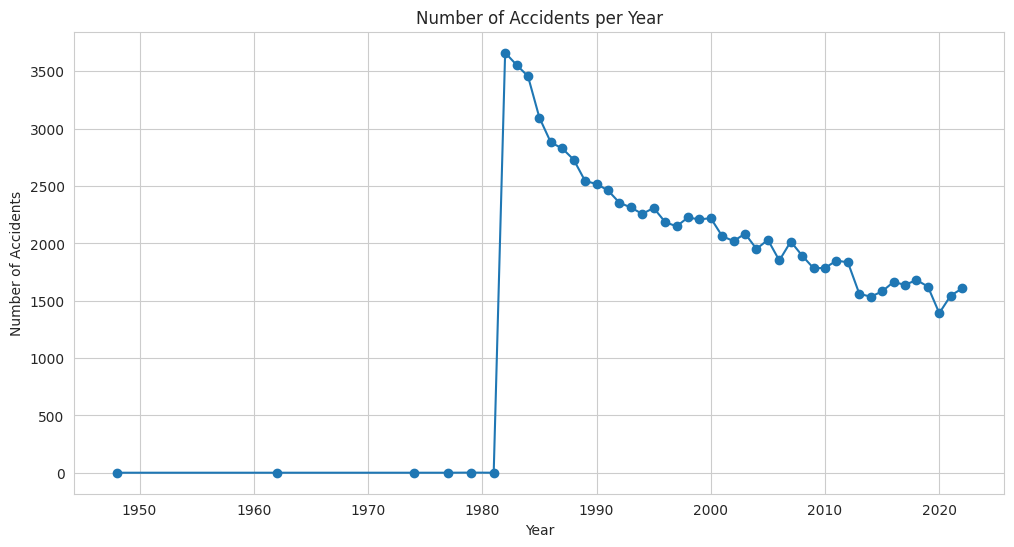

In [30]:
# Extract year from Event.Date
df['Year'] = df['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = df.groupby('Year').size()

# Display
print(accidents_per_year)

#Plot it
plt.figure(figsize=(12,6))
accidents_per_year.plot(kind='line', marker='o')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


Get sum of fatalities over time per year

Year
1948       2
1962       4
1974       3
1977       2
1979       1
1981       4
1982    1585
1983    1273
1984    1229
1985    1648
1986    1180
1987    1237
1988    1195
1989    1532
1990     999
1991    1087
1992    1273
1993     865
1994    1183
1995    1236
1996    2533
1997    1296
1998    1325
1999    1221
2000    1765
2001    1709
2002    1386
2003    1374
2004     978
2005    1689
2006    1489
2007    1335
2008    1201
2009    1184
2010    1370
2011     931
2012    1035
2013     822
2014    1428
2015    1101
2016     820
2017     640
2018    1044
2019     960
2020     770
2021     589
2022     668
Name: Total.Fatal.Injuries, dtype: int64


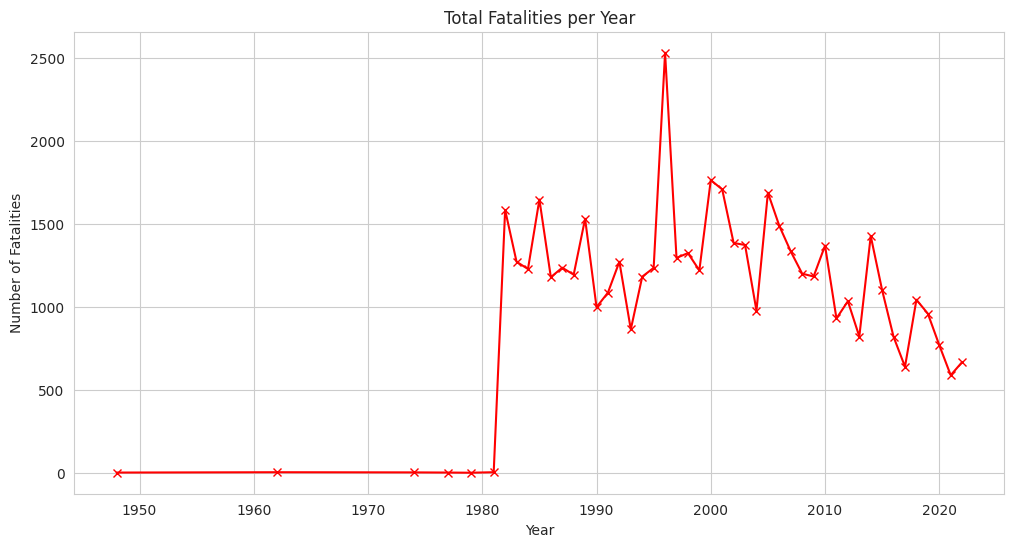

In [31]:
fatalities_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

# Display
print(fatalities_per_year)

# Plot
plt.figure(figsize=(12,6))
fatalities_per_year.plot(kind='line', color='red', marker='x')
plt.title('Total Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()
